### Setup 

activate npx

#### Create dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from scipy.special import expit, logit

X, y, coef = make_regression(
    n_samples=1000, n_features=5, n_informative=3, noise=5.0, coef=True, random_state=0
)

# mapping the data to the interval [0,1]
y = expit(y / 50)  # the factor 50 just scales the data appropriately

print("The data was generated with the following coefficients:")
print(coef)

The data was generated with the following coefficients:
[10.71453179  0.          0.         66.49948238 41.20593377]


In [2]:
from scipy.special import loggamma
from scipy.special import expit, logit


def logLikelihood(params, y, X):
    b = np.array(params[0:-1])  # the beta parameters of the regression model
    phi = params[-1]  # the phi parameter
    mu = expit(np.dot(X, b))

    eps = 1e-6  # used for safety of the gamma and log functions avoiding inf
    res = -np.sum(
        loggamma(phi + eps)  # the log likelihood
        - loggamma(mu * phi + eps)
        - loggamma((1 - mu) * phi + eps)
        + (mu * phi - 1) * np.log(y + eps)
        + ((1 - mu) * phi - 1) * np.log(1 - y + eps)
    )

    return res

In [3]:
from scipy.optimize import minimize

# initial parameters for optimization
phi = 1
b0 = 1
x0 = np.array([b0, b0, b0, b0, b0, phi])

res = minimize(
    logLikelihood,
    x0=x0,
    args=(y, X),
    bounds=[
        (None, None),
        (None, None),
        (None, None),
        (None, None),
        (None, None),
        (0, None),
    ],
)

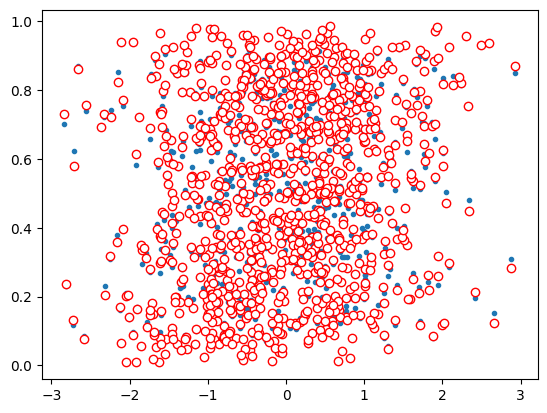

In [10]:
b = np.array(res.x[0 : X.shape[1]])  # optimal regression parameters
y_ = expit(np.dot(X, b))  # predictions
plt.plot(X[:, 0], y_, ".")
plt.plot(X[:, 0], y, "ro", markerfacecolor="w")